### Raíces de funciones

In [2]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

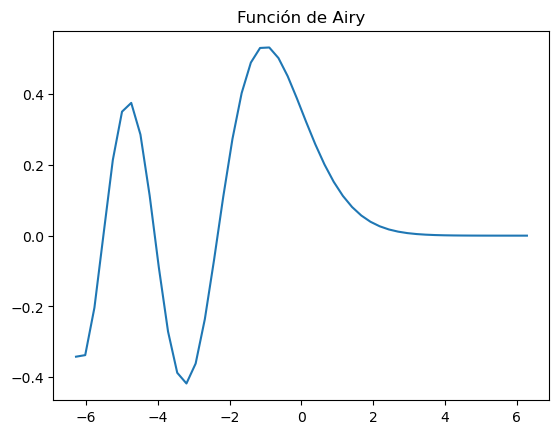

In [12]:
x = np.linspace(-2*np.pi,2*np.pi)
y = sp.airy(x)[0]

plt.title("Función de Airy")
plt.plot(x,y)
plt.show()

In [30]:
def mi_airy(x):
    return sp.airy(x)[0]

In [107]:
def raiz_bipart(f, x_izq, x_der, err = 1e-8):
    f_izq, f_med = f(x_izq), 2*err

    d_raiz = 2*err
    contador = 0
    
    while abs(f_med) >= err or d_raiz>= err: 
        
        x_med = 0.5*(x_izq + x_der)
        f_med = f(x_med)

        if (f_med * f_izq < 0):
            x_der = x_med
        else:
            x_izq = x_med
            f_izq = f_med

        contador += 1
        d_raiz = abs(x_izq-x_der)
        # print(contador, '\t f =', f_med, '\t x0 =',x_med)

    return x_med

In [108]:
x0 = raiz_bipart(mi_airy, -3, -2)

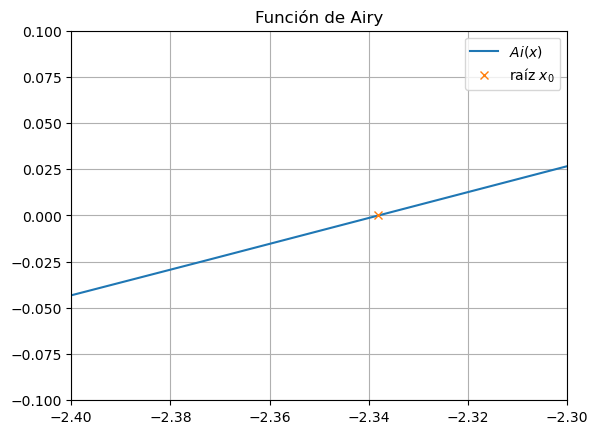

In [109]:
x = np.linspace(-5,5,100)
y = sp.airy(x)[0]
plt.title("Función de Airy")
plt.plot(x,y,label=r"$Ai(x)$")
plt.plot(x0,[0],'x',label=r"raíz $x_0$")
plt.xlim([-2.4,-2.3]), plt.ylim([-0.1,0.1])
plt.grid(),plt.legend()
plt.show()

In [119]:
# Cuadrado desplazado
def x2_desp(x,b):
    return x*x - b

In [132]:
def raiz_newton_parabola(b, cifras = 5, x1 = 0.1):
    err = 10**(-cifras)
    x_old = x1
    contador = 0
    d_raiz = 2*err
    
    while abs(x2_desp(x_old,b)) >= err or d_raiz >= err: 
        
        x_new = x_old - x2_desp(x_old,b)/(2*x_old)
        d_raiz = abs(x_new - x_old) # MENTIRA: Se puede quitar el abs porque x_new siempre es menor a x_old
        x_old = x_new

        contador += 1
        print(contador, '\t x0 =',x_new)

    return x_new

1 	 x0 = 215.15
2 	 x0 = 107.67497676039973
3 	 x0 = 54.03725624314414
4 	 x0 = 27.41668682209555
5 	 x0 = 14.492902104794268
6 	 x0 = 8.730625846683813
7 	 x0 = 6.829053825509902
8 	 x0 = 6.564304400179268
9 	 x0 = 6.558965505611019
10 	 x0 = 6.5589633327229935


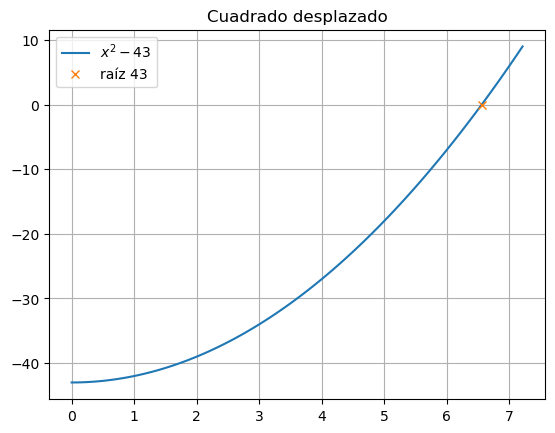

In [141]:
b = 43.02
x0 = raiz_newton_parabola(b, 5)

x = np.linspace(0,x0*1.1,100)
y = cuadrado_desplazado(x, b)
plt.title('Cuadrado desplazado')
plt.plot(x,y,label=r"$x^2 - %i$" % b)
plt.plot(x0,[0],'x',label=r"raíz %i" % b)
plt.grid(),plt.legend()
plt.show()